In [69]:
#Importacion de librerias

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Cargamos el Dataset 

Datos = pd.read_csv("C:/Users/Nicolas/Desktop/archive(2)/Mall_Customers.csv")

In [25]:
Datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
#Descripcion de los datos

Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
# Calcular los límites usando IQR
Q1 = Datos['Annual Income (k$)'].quantile(0.25)
Q3 = Datos['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la mediana de la columna
median_income = Datos['Annual Income (k$)'].median()

# Reemplazar valores menores que el límite inferior o mayores que el límite superior con la mediana
Datos['Annual Income (k$)'] = Datos['Annual Income (k$)'].apply(lambda x: median_income if (x < lower_bound or x > upper_bound) else x)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

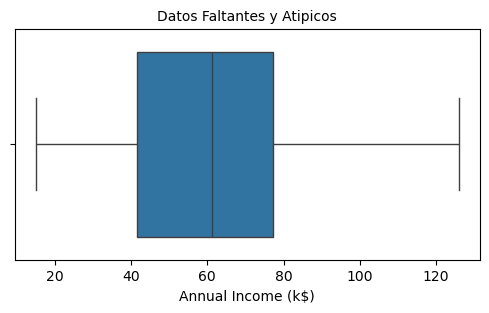

In [41]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

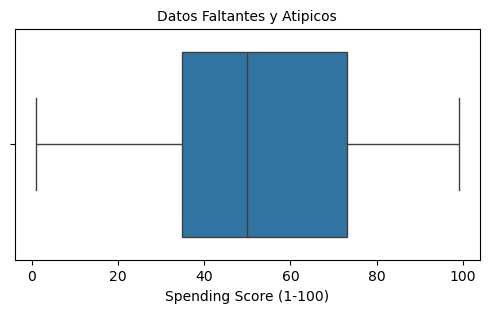

In [43]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

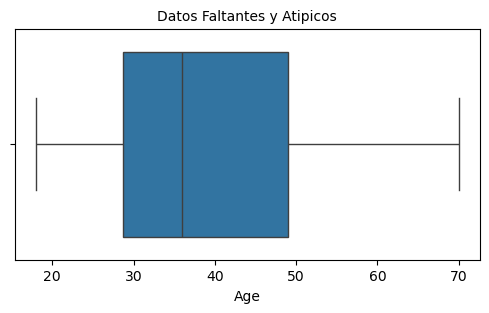

In [45]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

In [47]:
#Filtrar columnas de modelo

Datos = Datos [["Age", "Spending Score (1-100)", "Annual Income (k$)"]]

In [49]:
#Revision de los datos de las variables objetivo

Datos.head(10)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15.0
1,21,81,15.0
2,20,6,16.0
3,23,77,16.0
4,31,40,17.0
5,22,76,17.0
6,35,6,18.0
7,23,94,18.0
8,64,3,19.0
9,30,72,19.0


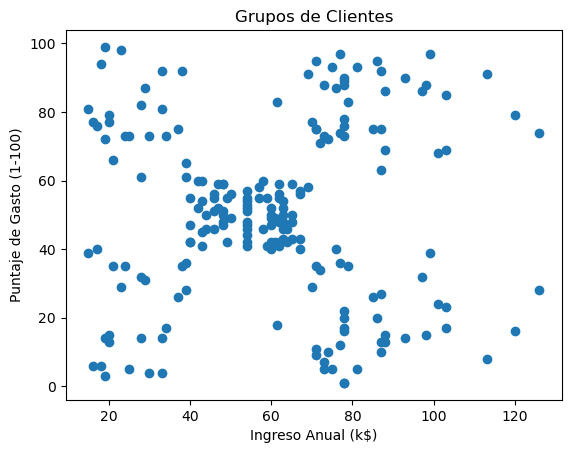

In [53]:
#Grafica de agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.title('Grupos de Clientes')
plt.show()


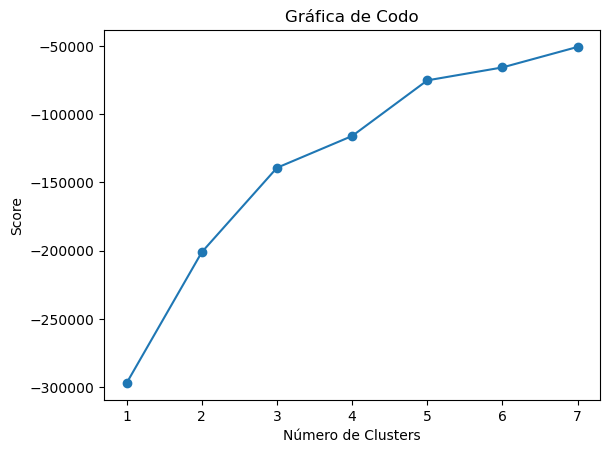

In [59]:
# Se realiza gráfica de codo para identificar valor de K
Nc = range (1, 8)
kmeans = [KMeans (n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos). score (Datos) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [61]:
#Generación del modelo de Agrupamiento del modelo con K-5 
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [63]:
#Se agrega La columna Grupo a La BD para identificar el numero de grupo del agrupamiento
Modelo.labels_
Datos["Grupo"] = Modelo.labels_
print (Datos)

     Age  Spending Score (1-100)  Annual Income (k$)  Grupo
0     19                      39                15.0      2
1     21                      81                15.0      2
2     20                       6                16.0      0
3     23                      77                16.0      2
4     31                      40                17.0      0
..   ...                     ...                 ...    ...
195   35                      79               120.0      4
196   45                      28               126.0      3
197   32                      74               126.0      4
198   32                      18                61.5      3
199   30                      83                61.5      4

[200 rows x 4 columns]


In [73]:
# Preparación de la métrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Métrica", "Valor"], tablefmt='pretty'))

+--------------------------+---------------------+
|         Métrica          |        Valor        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.37941855208831543 |
| Indice Calinski Harabasz | 135.02816600839415  |
|  Indice Davies Bouldin   | 0.9869520866905737  |
+--------------------------+---------------------+


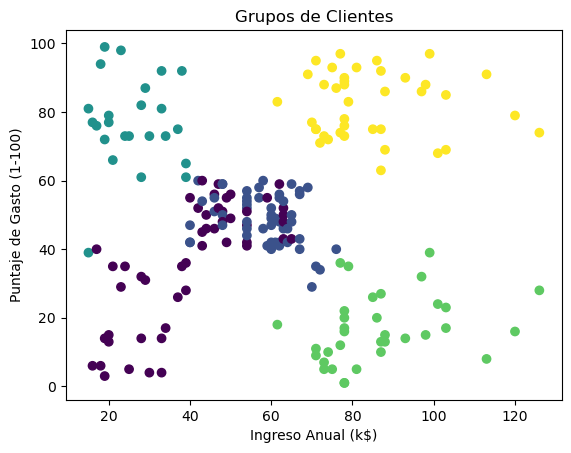

In [77]:

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.title('Grupos de Clientes')
plt.show()
